<a href="https://colab.research.google.com/github/Devan5622/ml-from-scratch/blob/master/Decision_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn]))) 
   
   
   
import numpy as np
import pandas as pd
import seaborn as sb

df=pd.read_csv('titanic.csv')
df.head()

Saving titanic.csv to titanic (6).csv
User uploaded file "titanic.csv" with length 61194 bytes


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***Drop some coloumns Which is not relevant to the analysis(they are not numeric)*** 

In [21]:
cols_to_drop=['Name','Ticket','Cabin']
df=df.drop(cols_to_drop, axis=1)
df.head(3)
 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


***Check For Null Values***

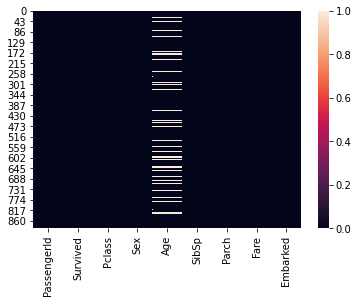

In [22]:
sb.heatmap(df.isnull())

***To replace missing values with interpolated values***

In [23]:
df['Age']=df['Age'].interpolate()

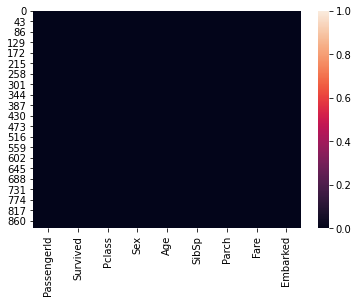

In [24]:
sb.heatmap(df.isnull())

***Drop Rows With Missing Values***

In [25]:
df=df.dropna()

In [26]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


***Here We are Converting Sex & Embarked Column In Binary form***

In [27]:
EmbarkedColumnDummy= pd.get_dummies(df['Embarked'])
SexColumnDummy= pd.get_dummies(df['Sex'])

In [29]:
df=pd.concat((df,EmbarkedColumnDummy,SexColumnDummy),axis=1)
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,1,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1
5,6,0,3,male,44.5,0,0,8.4583,Q,0,1,0,0,1
6,7,0,1,male,54.0,0,0,51.8625,S,0,0,1,0,1
7,8,0,3,male,2.0,3,1,21.0750,S,0,0,1,0,1
8,9,1,3,female,27.0,0,2,11.1333,S,0,0,1,1,0
9,10,1,2,female,14.0,1,0,30.0708,C,1,0,0,1,0


In [31]:
#Drop the redundant columns thus converted
df=df.drop(['Sex','Embarked'],axis=1)

In [33]:
#Seprate the data frame into x & y data
x=df.values
y=df['Survived'].values

In [34]:
#Delete the survived column from x
x=np.delete(x,1,axis=1)

***Split Dataset***

In [35]:
#Split the dataset into 70% Training & 30%Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [36]:
x_train.shape,y_train.shape

((622, 11), (622,))

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
 

In [47]:
names = ["Decision_Tree","Random_Forest"]


classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100)]

In [48]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    scores.append(score)

In [49]:

scores

[0.7790262172284644, 0.7940074906367042]

In [50]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Decision_Tree,0.779026
1,Random_Forest,0.794007


In [51]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Decision_Tree,0.779026
1,Random_Forest,0.794007


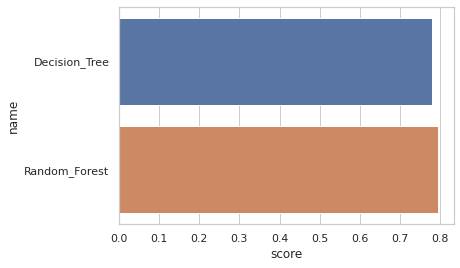

In [52]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)